# Redes complejas

![Martin Grandjean, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Social_Network_Analysis_Visualization.png/640px-Social_Network_Analysis_Visualization.png)

*Computación Social y Personalización*

*Grado en Ciencia de Datos e Inteligencia Artificial*

**Sergio D'Antonio Maceiras**

[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

## Objetivo

En esta sesión de laboratorio trabajaremos con el concepto de [red compleja](https://en.wikipedia.org/wiki/Complex_network), ya que las redes sociales son ejemplos concretos de redes complejas. Estudiaremos los diferentes tipos de redes complejas así como las métricas que se pueden calcular sobre ellas para obtener conocimiento útil. Para ello nos apoyaremos en la librería [NetworkX](https://networkx.org/).

Las tareas a realizar son:

1. Instalar la librería **NetworkX** y familiarizarnos con las operaciones básicas que soporta: creación, manipulación y visualización de redes complejas.
2. Descargar un conjunto de datos que representa una red compleja y convertirlo en un grafo de **NetworkX**.
3. Investigar métricas de analítica de redes complejas para contestar a las preguntas propuestas sobre la red construida a partir del conjunto de datos anterior.

## Material de referencia

Para llevar a cabo las tareas planteadas puedes consultar las siguientes referencias:

Documentación:

- [The Structure and Function of Complex Networks](https://arxiv.org/abs/cond-mat/0303516)
- [Documentación NetworkX](https://networkx.org/documentation/stable/)

Tutoriales:

- [Tutorial oficial de NetworkX](https://networkx.org/documentation/stable/tutorial.html)

# NetworkX

![NetworkX Logo](https://networkx.org/_static/networkx_logo.svg)

> NetworkX es un paquete de Python para la creación, manipulación y estudio de la estructura, la dinámica y las funciones de redes complejas. Proporciona:
> - herramientas para el estudio de la estructura y la dinámica de las redes sociales, biológicas y de infraestructuras;
>
> - una interfaz de programación estándar y una implementación de gráficos adecuada para muchas aplicaciones
>
> - un entorno de desarrollo rápido para proyectos colaborativos y multidisciplinares
>
> - una interfaz para los algoritmos numéricos existentes y el código escrito en C, C++ y FORTRAN; y
>
> - la capacidad de trabajar sin problemas con grandes conjuntos de datos no estándar.
>
> Con NetworkX puede cargar y almacenar redes en formatos de datos estándar y no estándar, generar muchos tipos de redes aleatorias y clásicas, analizar la estructura de las redes, construir modelos de redes, diseñar nuevos algoritmos de redes, dibujar redes y mucho más.

Vamos a instalar la librería en su versión **2.7.1**:

Las **redes complejas** son, en definitiva, grafos que presentan ciertas características topológicas que no son triviales. Recordemos que un grafo $G$ es una estructura matemática que se puede definir como:

$$G=(V,E)$$

donde $V$ es el conjunto de vértices (o nodos) del grafo, y $E$ las aristas entre pares de vértices.

En **NetworkX** tenemos el constructor [`Graph()`](https://networkx.org/documentation/stable/reference/classes/graph.html#networkx.Graph) para inicializar un grafo vacío y los métodos de los objetos grafo [`Graph.add_node()`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_node.html#networkx.Graph.add_node) y [`Graph.add_edge()`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html#networkx.Graph.add_edge) para añadir nodos y aristas, respectivamente.

**Tarea**: Construye con *NetworkX* el grafo representado en la siguiente imagen:

![Ejemplo de grafo no dirigido](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/333px-6n-graf.svg.png)

Como sugerencia, investiga el método [`Graph.add_nodes_from(iterable)`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_nodes_from.html#networkx.Graph.add_nodes_from) que permite añadir múltiples nodos de una sola vez recorriendo una estructura iterable (lista, tupla, diccionario, etc.). Las aristas también se pueden añadir a partir de una estructura iterable.

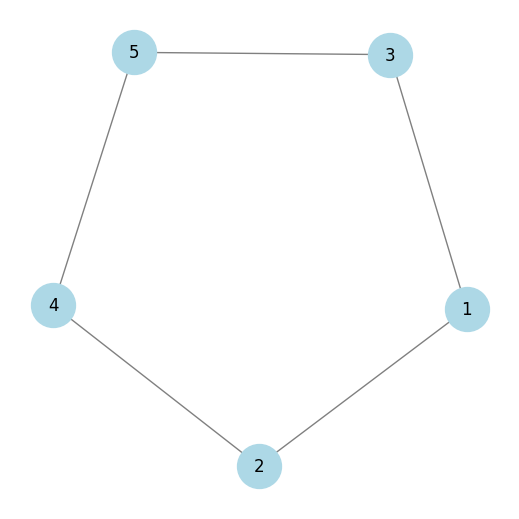

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo
g = nx.Graph()

# Agregar nodos 
g.add_nodes_from([1, 2, 3, 4, 5])

# Agregar aristas
g.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 5), (4, 5)])

# Dibujar el grafo
plt.figure(figsize=(5, 5))
nx.draw(g, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=12)
plt.show()

Podemos obtener información útil sobre el grafo que acabamos de construir. Podemos calcular el número de nodos y aristas para comprobar que se corresponde con el grafo de la figura:

In [2]:
print(g.number_of_nodes())
print(g.number_of_edges())

5
5


Aunque **NetworkX** no es una librería para la representación visual de redes complejas, proporciona una funcionalidad básica para representar gráficamente los grafos basándose en **Matplotlib**. La función para plotear grafos es [`draw_networkx`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

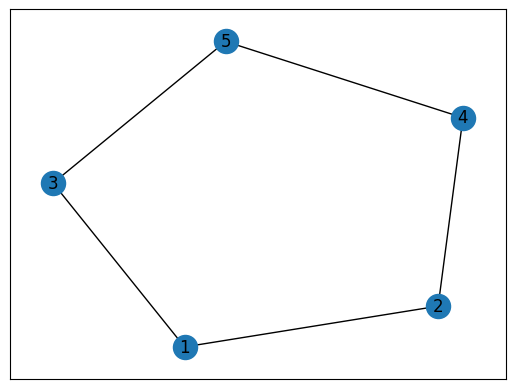

In [3]:
import matplotlib.pyplot as plt
nx.draw_networkx(g)

El grafo que hemos creado se conoce como **grafo no dirigido**, puesto que la relación entre dos nodos es de doble sentido. Además, no hemos incluido ningún tipo de información en las aristas. Dependiendo del dominio podríamos necesitar reflejar esta información adicional en nuestras redes complejas.

**NetworkX** nos permite crear grafos dirigidos mediante el constructor [`DiGraph()`](https://networkx.org/documentation/stable/reference/classes/digraph.html#networkx.DiGraph). Cuando agregamos aristas a un grafo dirigido debemos prestar especial atención al orden de la tupla, ya que determina la dirección de la arista. Por ejemplo, `g.add_edge((3,7))` establece una arista dirigida desde el nodo 3 hacia el nodo 7, pero no a la inversa.

Vamos a generar un grafo dirigido aleatorio de 10 nodos con la función [`erdos_renyi_graph()`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#erdos-renyi-graph):

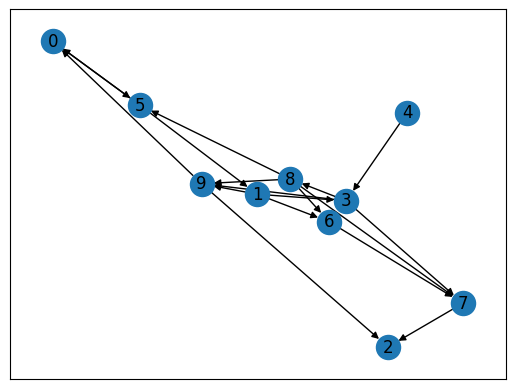

In [4]:
gd = nx.erdos_renyi_graph(10, 0.3, seed=1337, directed=True)

nx.draw_networkx(gd)

Como era de esperar, las aristas ahora son dirigidas y por tanto se representan como flechas. Hemos fijado la semilla del generador aleatorio para que siempre se genere el mismo grafo.

Una de las ventajas de usar un grafo como estructura de datos es que es posible acceder a los nodos relacionados de un nodo en particular (sus vecinos) con una complejidad computacional mínima. En **NetworkX** podemos acceder a esta información mediante las vistas `nodes`, `edges` y `adj` de un grafo determinado. Estas vistas devuelven un diccionario indexable para consultar la información de los nodos, aristas y vecino de un nodo determinado, respectivamente. Para calcular los vecinos de un nodo también se puede usar el método `neighbors(id_nodo)` del grafo en cuestión.

**Tarea**: resuelve las siguientes preguntas sobre el grafo dirigido aleatorio `gd` que acabamos de crear, completando cada una de las celdas de código.

*¿Qué nodos están relacionados con el nodo 3?*

In [5]:
vecinos_3 = g.neighbors(3)
print(list(vecinos_3))

[1, 5]


*¿Y el nodo 2?*

In [6]:
vecinos_2 = g.neighbors(2)
print(list(vecinos_2))

[1, 4]


# Delfines sociales

Vamos a trabajar con un conjunto de datos sobre una manada de delfines que se relacionan entre sí. El artículo original donde se describe es el siguiente:

> D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson, *The bottlenose dolphin community of Doubtful Sound features a large proportion of long-lasting associations*, [Behavioral Ecology and Sociobiology 54, 396-405](https://link.springer.com/article/10.1007/s00265-003-0651-y) (2003).

Este conjunto de datos describe una red social formada por delfines de una manada. Los nodos de la red se corresponden con los delfines de la manada. Una arista entre dos nodos significa que los delfines han establecido una relación mutua duradera entre ellos.

El conjunto de datos está en un fichero de texto plano que se puede descargar de la siguiente URL: [https://drive.upm.es/s/m8PGZqibr6NfAj3](https://drive.upm.es/s/m8PGZqibr6NfAj3)

El formato del fichero es el siguiente:

- La primera fila contiene dos valores separados por un espacio en blanco `N A`: el primer valor es el número de nodos y el segundo el de aristas.
- El resto de filas codifican cada una de las aristas de la forma `ID1 ID2`, representando una arista entre los nodos `ID1` e `ID2`.

Las primeras 5 filas del fichero son las siguientes:

```
62 159
11 1
15 1
16 1
41 1
```

## Construcción de la red con NetworkX

Piensa qué tipo de grafo encaja mejor con la red social de los delfines, procesa el fichero del conjunto de datos y construye el grafo con la librería **NetworkX**.


In [7]:
#importa un grafo en formato gml

Gd = nx.read_gml('dolphins.gml')

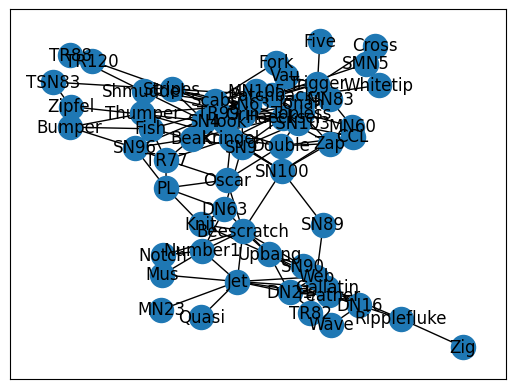

In [8]:
nx.draw_networkx(Gd)

## Métricas de análisis de redes complejas

Vamos a investigar las diferentes métricas de análisis de redes que podemos calcular sobre nuestra red para dar respuesta a una serie de preguntas. Podemos usar la documentación referenciada en esta libreta además de buscar en Internet.

**Tarea**: Responde razonadamente a las siguientes preguntas, indicando las métricas empleadas.

### Pregunta 1: ¿Qué delfín dirías que es el más sociable? ¿Y el que menos?

In [9]:
# encuentra el nodo con mayor grado

max_degree = max(dict(Gd.degree()).items(), key=lambda x: x[1])
print(max_degree)

('Grin', 12)


### Pregunta 2: ¿Dirías que en esta red social se cumple el principio de los 6 grados de separación? ¿Podrías afinar un poco más?

El [principio de los 6 grados de separación](https://en.wikipedia.org/wiki/Six_degrees_of_separation) establece que es posible relacionar a cualesquiera dos individuos de una población en menos de seis pasos.

In [13]:
nx.radius(Gd)

5

De modo que podemos garantizar que efectivamente se cumple 

### Pregunta 3: ¿Dirías que los delfines más sociables prefieren relacionarse entre ellos?


In [15]:
import networkx as nx
import numpy as np

# Obtener los grados de los nodos
degrees = dict(Gd.degree())

# Filtrar los nodos con grado alto (por ejemplo, mayor que la media)
high_degree_nodes = [node for node, degree in degrees.items() if degree > np.mean(list(degrees.values()))]

# Crear un subgrafo con los nodos de alto grado
subgraph = Gd.subgraph(high_degree_nodes)

# Calcular la correlación de Pearson entre los grados de los nodos conectados
edges = subgraph.edges()
degree_pairs = [(degrees[u], degrees[v]) for u, v in edges]
if degree_pairs:
    correlation = np.corrcoef(*zip(*degree_pairs))[0, 1]
else:
    correlation = 0  # No hay suficientes datos para calcular la correlación

print(f"Pearson correlation coefficient for high-degree nodes: {correlation}")

Pearson correlation coefficient for high-degree nodes: -0.08937358400208704


### Pregunta 4: ¿Serías capaz de identificar las pandillas de la manada?

En una red compleja se considera una pandilla como un subgrafo en el cual todos sus nodos están conectados entre sí.

In [18]:
list(nx.find_cliques(Gd))

[['Cross', 'Trigger'],
 ['PL', 'DN63', 'Knit'],
 ['PL', 'TR77', 'SN96'],
 ['PL', 'TR77', 'Oscar'],
 ['DN16', 'Gallatin', 'Web', 'Feather'],
 ['DN16', 'Wave'],
 ['DN63', 'Knit', 'Upbang'],
 ['DN63', 'Number1'],
 ['DN63', 'SN9'],
 ['MN105', 'Topless', 'Trigger', 'Jonah', 'Patchback'],
 ['MN105', 'Topless', 'SN4'],
 ['MN105', 'Scabs', 'SN4'],
 ['DN21', 'Gallatin', 'Web', 'Jet', 'Feather'],
 ['DN21', 'Gallatin', 'Web', 'Upbang'],
 ['DN21', 'Wave'],
 ['Jonah', 'Kringel'],
 ['Jonah', 'MN83', 'Topless', 'Trigger', 'Patchback'],
 ['Jonah', 'MN83', 'Topless', 'Haecksel'],
 ['Notch', 'Number1', 'Mus'],
 ['Notch', 'Number1', 'Beescratch'],
 ['Oscar', 'Beescratch'],
 ['Oscar', 'Kringel', 'Double'],
 ['Oscar', 'Kringel', 'TR77'],
 ['TSN83', 'Zipfel'],
 ['TSN83', 'Stripes'],
 ['TR120', 'TR88'],
 ['TR120', 'Stripes'],
 ['Grin', 'MN83'],
 ['Grin', 'Scabs', 'SN63', 'Hook'],
 ['Grin', 'Scabs', 'SN63', 'Stripes'],
 ['Grin', 'Scabs', 'SN4', 'Shmuddel'],
 ['Grin', 'Scabs', 'SN4', 'Hook'],
 ['Grin', 'Scabs'



```
# Tiene formato de código
```

### Pregunta 5: ¿Podrías identificar las distintas comunidades de delfines en función de sus relaciones sociales?

In [20]:
# Completar

import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# Cargar el grafo desde el fichero GML
Gd = nx.read_gml('dolphins.gml')

# Aplicar el algoritmo de Louvain para detectar comunidades
partition = community_louvain.best_partition(Gd)

# Dibujar el grafo con las comunidades
pos = nx.spring_layout(Gd)
cmap = plt.get_cmap('viridis')
nx.draw_networkx_nodes(Gd, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(Gd, pos, alpha=0.5)
plt.show()

ModuleNotFoundError: No module named 'community'